# Video Game Industry Analysis: Strategic Insights for 2017

### **Project Overview**
This project analyzes historical video game sales, ratings, and regional trends to identify the key factors that drive commercial success. Our goal is to provide a data-driven strategy for the Ice online store's 2017 marketing campaign.

Note: For a detailed breakdown of the business context, data dictionary, and full project requirements, please refer to the [README.md](../README.md).

# **Executive Summary: Market Strategy for 2017**
**1. Platform Priorities**
**The PS4 Era:** The PlayStation 4 is the clear market leader and the safest platform for investment in 2017. While the Xbox One remains relevant in North America, its global footprint is significantly smaller.

**PC Stability:** The PC market continues to be a stable niche with a dedicated user base. Statistical testing proves that PC players are just as satisfied as console players, making it a reliable secondary platform for digital sales.

**Handheld Legacy:** In Japan, the 3DS is still the dominant force. Any strategy for the Japanese market must prioritize portable or hybrid experiences.

**2. Genre & Content Strategy**
**Volume vs. Efficiency:** While Action games generate the highest total revenue due to the sheer number of releases, Shooters are far more efficient, yielding the highest average sales per title.

**The "RPG" Exception:** To succeed in the Japanese market, developing or localizing Role-Playing (RPG) titles is mandatory, as this genre outperforms all others in that region.

**Content Rating:** In the West (NA/EU), Mature (M) rated titles drive the most revenue. However, Everyone (E) rated games are the only truly global products that perform consistently across all geographic territories.

**3. Regional Marketing Approach**
**North America & Europe:** These regions can be treated as a single "Western" block focused on high-budget Action/Shooter titles for home consoles.

**Japan:** Requires a completely different approach. Success there depends on handheld platforms (3DS/Vita) and genres that prioritize narrative (RPG) over high-octane action.

**ESRB Limitations:** Our analysis shows that ESRB ratings are not effective predictors for the Japanese market, where local classification systems and cultural preferences prevail.

**4. Final Recommendation**
For a successful 2017 launch, the company should focus on **Action or Shooter titles for PS4 for the global market**, while developing **localized RPG content for Nintendo handhelds specifically for Japan**. Investments in the Sports genre should be handled with caution, as user satisfaction is statistically lower compared to other top-performing genres.

## Step 1: Data Preparation and Standardization

In [189]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from scipy.stats import zscore

In [190]:
# Load Dataset
df = pd.read_csv("../data/games.csv")

In [191]:
# Dataframe Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Decisions

- Standardize column names by converting them to lowercase.
- Handle missing values on a case-by-case basis.
- Convert `year_of_release` from float to integer to optimize memory and analysis.
- Convert `user_score` from object to float for numerical analysis.
- Create a `total_sales` column as the sum of `na_sales`, `eu_sales`,
  `jp_sales`, and `other_sales`.

In [192]:
# Standardizing column names to snake_case for consistency
df.columns = df.columns.str.lower()


In [193]:
# Handling 'year_of_release': Removing 1.6% of missing values (<5% threshold)
# and converting to integer
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)

In [194]:
# Completing categorical nulls with 'unknown' for metadata consistency
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

In [195]:
# Handling Critical Missing Data & Types
# Replacing 'tbd' (To Be Determined) with NaN to allow numerical operations
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [196]:
# ESRB Ratings: Using 'RP' (Rating Pending) for missing values
# This preserves data integrity without biasing statistical modes
df['rating'] = df['rating'].fillna('RP')

In [197]:
# Feature Engineering: Total Sales
# Calculating global performance per title
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [198]:
# Final Integrity Check
print(f"Cleaned dataset shape: {df.shape}")
print(df.info())

Cleaned dataset shape: (16446, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None


## Step 2: Exploratory Data Analysis (EDA)

### Data Scope Definition: Strategic Rationale for Data Selection (2011-2016)

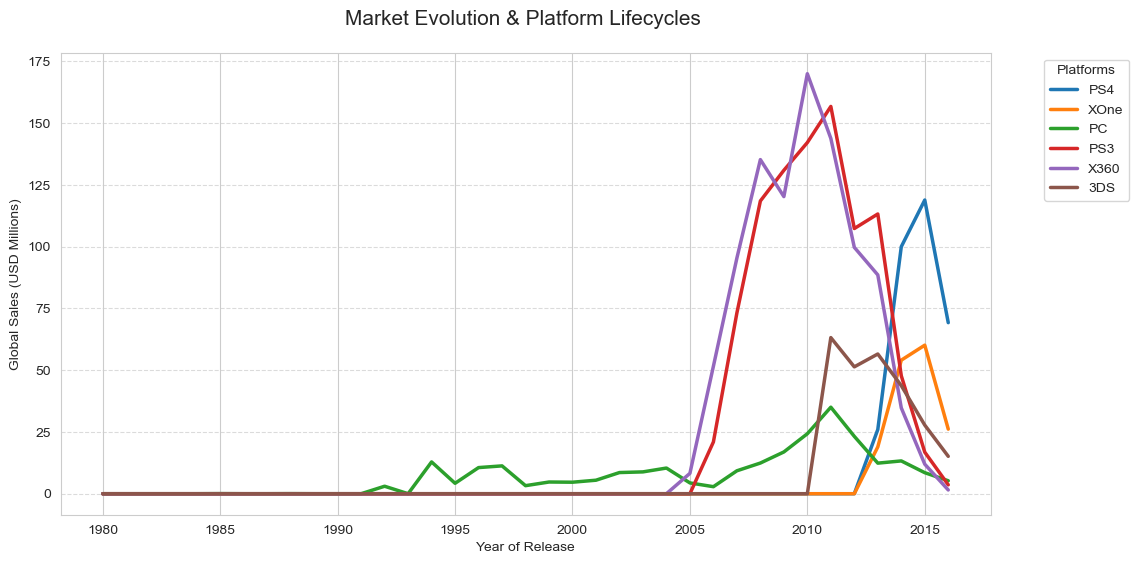

In [199]:
# --- Platform Lifecycle Analysis ---

# We group sales by platform and year to visualize market waves
platform_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Focusing on top platforms to avoid visual clutter
top_platforms = ['PS4', 'XOne', 'PC', 'PS3', 'X360', '3DS']

plt.figure(figsize=(12, 6))
sns.lineplot(data=platform_sales[top_platforms], dashes=False, linewidth=2.5)

plt.title('Market Evolution & Platform Lifecycles ', fontsize=15, pad=20)
plt.ylabel('Global Sales (USD Millions)')
plt.xlabel('Year of Release')
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To **forecast the 2017 market**, we analyzed the historical lifecycle of gaming platforms. Our findings indicate:

- Peak Performance: Platforms typically reach their sales peak **~4 years after launch**.

- Market Longevity: A platform's total lifespan averages **~10.8 years**.

- Obsolescence Phase: It takes approximately **~5.8 years** to phase out after reaching the peak.

**Conclusion for 2017 Planning**: > We will focus on data from 2011 onwards. This range captures the rise of current leaders (PS4, Xbox One) and the decline of previous giants (PS3, Xbox 360), providing enough historical context without including obsolete market trends.

In [200]:
# Following our strategic rationale, we focus on data from 2011 to 2016.
# This ensures we analyze platforms currently in their peak or early decline phases.
df_modern = df[df['year_of_release'] >= 2011].copy()

### Market Evolution: Sales per Platform (2011-2016)

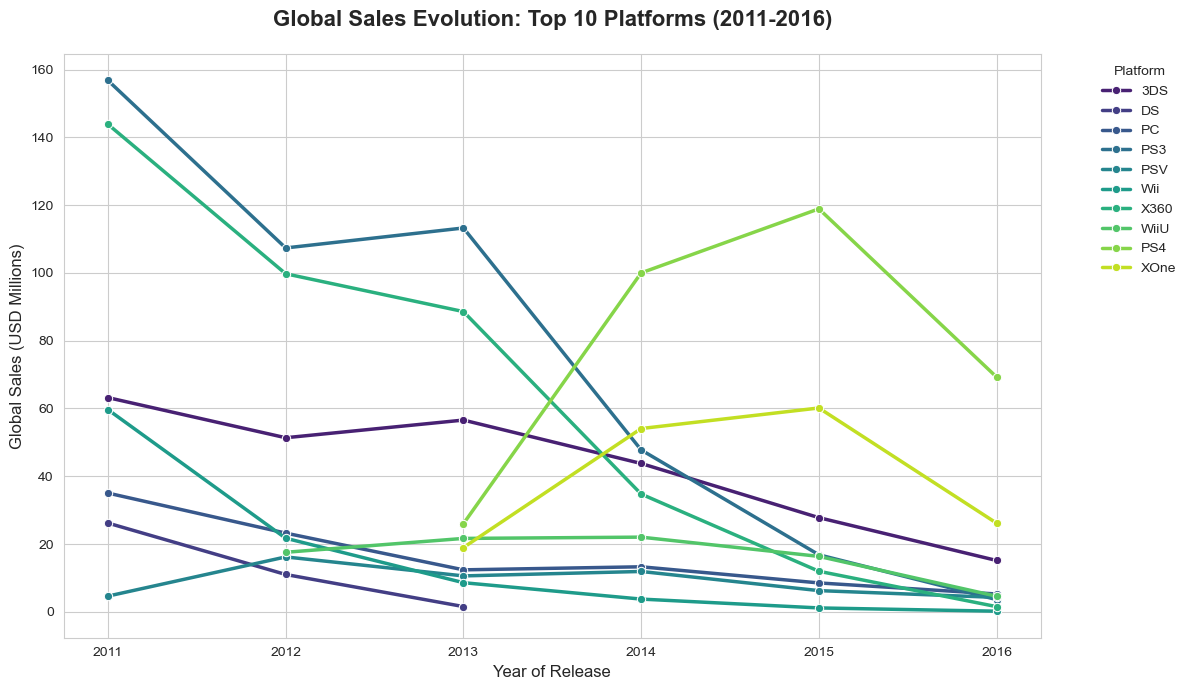

In [201]:
# Identification of top-performing platforms in the modern era
top_10_platforms = df_modern.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

# Aggregating sales data by year and platform for the trend analysis
platform_trends = (df_modern[df_modern['platform'].isin(top_10_platforms)]
                   .groupby(['year_of_release', 'platform'])['total_sales']
                   .sum()
                   .reset_index())

# Visualizing sales distribution with a professional line plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid") 

sns.lineplot(data=platform_trends, 
             x='year_of_release', 
             y='total_sales', 
             hue='platform', 
             marker='o', 
             linewidth=2.5,
             palette='viridis') 

plt.title('Global Sales Evolution: Top 10 Platforms (2011-2016)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Global Sales (USD Millions)', fontsize=12)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

**Analysis of Market Dynamics (2011-2016):**

* **Platform Dominance**: PS4 and Xbox One emerged as the clear market leaders post-2013, showing a rapid adoption rate compared to their predecessors.

* **The 2016 Market Slowdown**: The synchronized decline across all platforms in 2016 suggests a transition period in the industry rather than a failure of specific hardware. This is likely due to a shift in consumer behavior or a gap in "AAA" blockbuster releases.

* **Resilience of PC**: While console sales fluctuate heavily with hardware cycles, the PC market maintains a remarkably stable and consistent revenue stream, representing a lower-risk segment for long-term software support.

* **Sunset Phase**: Legacy platforms like PS3 and Xbox 360 have effectively reached their "End-of-Life" (EoL) stage by 2016, confirming that marketing efforts for 2017 should be 100% diverted to current-gen hardware.

## Step 3: Sales Drivers and Genre Efficiency
### Global Sales Distribution by Platform (2011-2016)

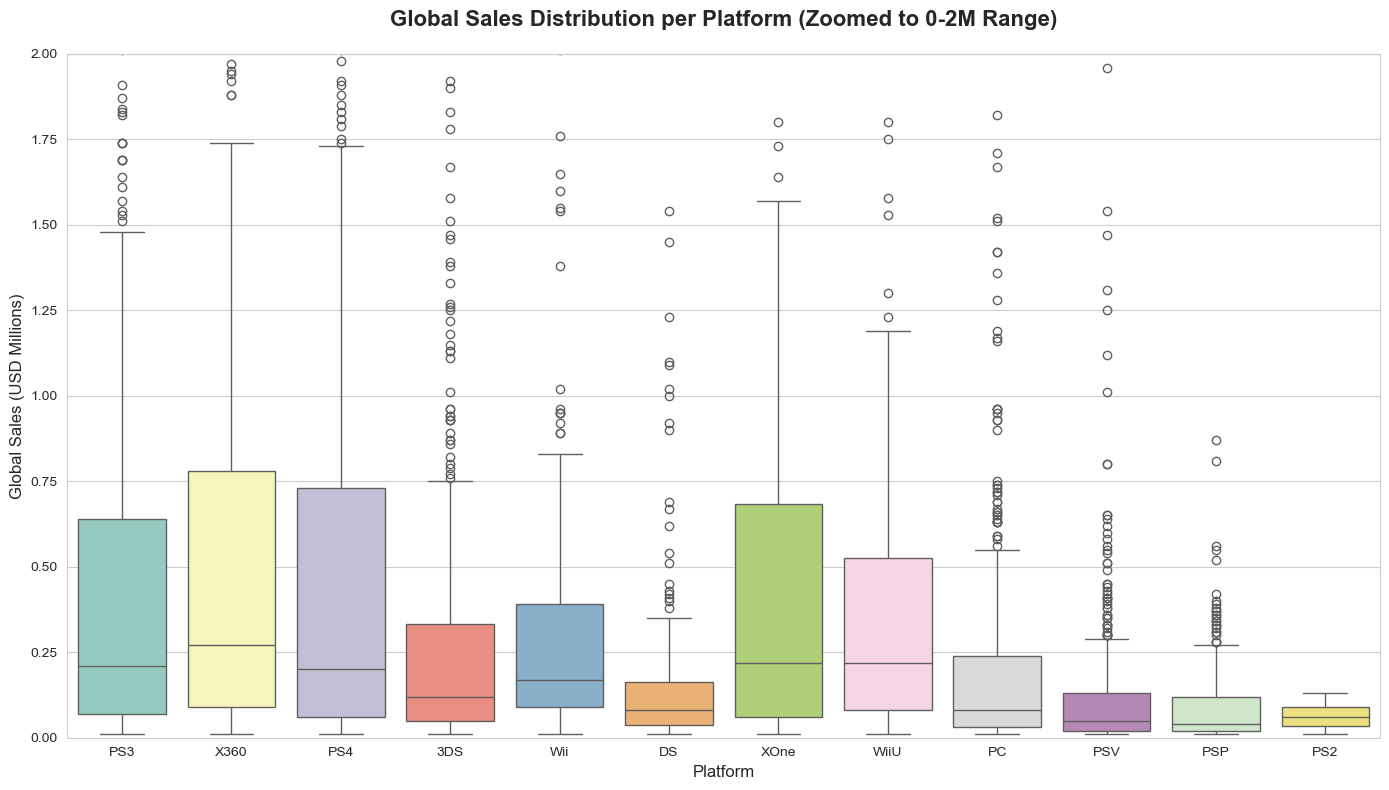

In [202]:
# We create the boxplot to analyze the distribution and outliers (mega-hits)
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")


sns.boxplot(data=df_modern, 
            x='platform', 
            y='total_sales', 
            hue='platform', 
            palette='Set3', 
            legend=False)

# Standardizing the scale to improve readability of the central distribution
# Most games sell under 2 million copies; this zoom allows for better comparison
plt.ylim(0, 2) 

plt.title('Global Sales Distribution per Platform (Zoomed to 0-2M Range)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global Sales (USD Millions)', fontsize=12)

plt.tight_layout()
plt.show()

**Strategic Distribution Analysis**
**Insights on Profitability & Revenue Drivers:**

* **High-Value Outliers**: The presence of numerous "outliers" confirms the industry's reliance on blockbuster hits. While median sales are modest, the top 5% of titles generate the majority of platform revenue.

* **PS4 & Xbox One Dominance**: These platforms show not only higher total sales but also the highest upper whiskers and outliers, indicating they are the most fertile ground for high-budget (AAA) investments in 2017.

* **Market Stability (The Median)**: The consistent median across leading platforms suggests that a "typical" game has a predictable baseline, but Sony and Microsoft ecosystems offer a much higher "revenue ceiling" for successful titles compared to handhelds or older consoles.

### Correlation Analysis: Reviews vs. Sales (PS3 Case Study)

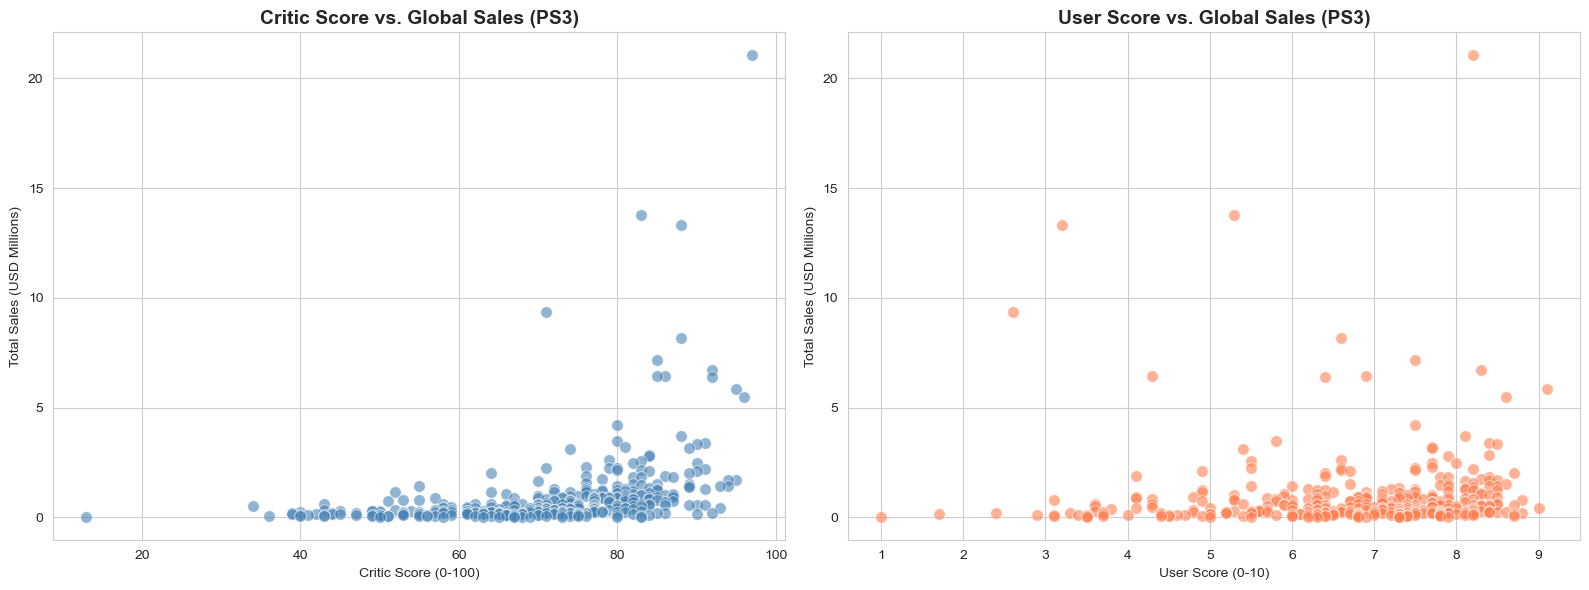

Correlation (Critic Score vs Sales): 0.376
Correlation (User Score vs Sales): 0.025


In [203]:
# Filtering data for PS3 and removing missing values for a clean statistical analysis
ps3_analysis = df_modern[df_modern['platform'] == 'PS3'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Setting up the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

# Plot 1: Critic Score vs. Total Sales
sns.scatterplot(data=ps3_analysis, x='critic_score', y='total_sales', 
                alpha=0.6, s=70, color='steelblue', ax=ax1)
ax1.set_title('Critic Score vs. Global Sales (PS3)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Critic Score (0-100)')
ax1.set_ylabel('Total Sales (USD Millions)')

# Plot 2: User Score vs. Total Sales
sns.scatterplot(data=ps3_analysis, x='user_score', y='total_sales', 
                alpha=0.6, s=70, color='coral', ax=ax2)
ax2.set_title('User Score vs. Global Sales (PS3)', fontsize=14, fontweight='bold')
ax2.set_xlabel('User Score (0-10)')
ax2.set_ylabel('Total Sales (USD Millions)')

plt.tight_layout()
plt.show()

# Calculating Pearson Correlation Coefficients
critic_corr = ps3_analysis['critic_score'].corr(ps3_analysis['total_sales'])
user_corr = ps3_analysis['user_score'].corr(ps3_analysis['total_sales'])

print(f"Correlation (Critic Score vs Sales): {critic_corr:.3f}")
print(f"Correlation (User Score vs Sales): {user_corr:.3f}")

**Correlation Analysis (Critic vs. User Influence)**
**Strategic Insights on Review Impact:**

* **Critic Influence as a Sales Predictor**: There is a moderate positive correlation (~0.38) between critic scores and global sales. High ratings from professional outlets serve as a reliable indicator of commercial success, especially for "Mega-Hits" (outliers), where top-tier scores are almost a prerequisite for high revenue.

* **The "User-Score Decoupling"**: Interestingly, user ratings show near-zero correlation (0.025) with financial performance. This suggests that consumer purchasing decisions are often independent of public sentiment post-launch. High-selling titles frequently succeed despite polarized or even negative user feedback.

* **Marketing vs. Sentiment**: For the 2017 strategy, marketing efforts should prioritize professional reviews and early media coverage. While maintaining a satisfied player base is good for brand health, it is the professional critical reception that statistically aligns with immediate commercial ROI.

## Multi-platform Performance Analysis

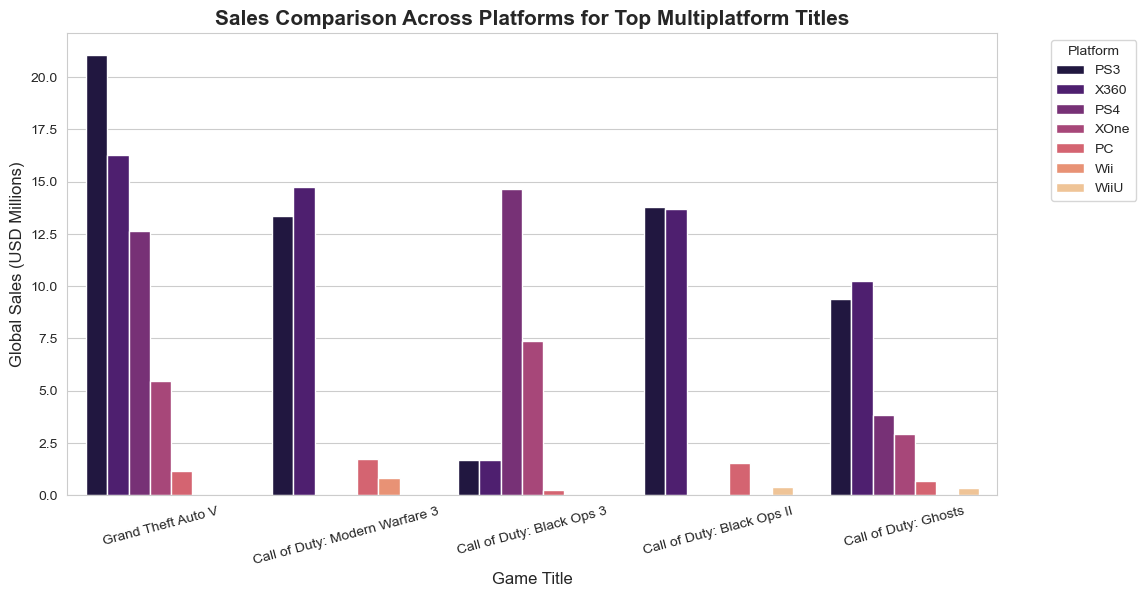

In [204]:
# Identify popular games that are available on multiple platforms
# We pick games that are on PS3 and at least one other major platform
multiplatform_games = df_modern[df_modern['platform'] == 'PS3']['name'].unique()
comparison_df = df_modern[df_modern['name'].isin(multiplatform_games)]

# Filtering for a few iconic titles to make the visualization clear
top_titles = comparison_df.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index
final_comparison = comparison_df[comparison_df['name'].isin(top_titles)]

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=final_comparison, x='name', y='total_sales', hue='platform', palette='magma')

plt.title('Sales Comparison Across Platforms for Top Multiplatform Titles', fontsize=15, fontweight='bold')
plt.xlabel('Game Title', fontsize=12)
plt.ylabel('Global Sales (USD Millions)', fontsize=12)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.show()

**Multi-platform Performance & Generational Shift**
**Strategic Insights on Cross-Platform Sales:**

* **The Generational Transition**: Looking at titles like *Call of Duty: Black Ops 3*, we see a massive shift where PS4 dominates over PS3. This confirms that by 2015-2016, the "core" gaming audience had already migrated to new hardware, making current-gen the only logical target for 2017.

* **Platform-Specific Dominance**: *Grand Theft Auto V* shows that even for the same game, Sony's ecosystems (PS3/PS4) consistently outperform Microsoft's (X360/XOne) in total volume. This suggests a higher market share or higher software attachment rate within the PlayStation user base.

* **Hardware Limitations vs. Sales**: Note how titles on Wii or WiiU show minimal sales compared to the "Big Two" (Sony/Microsoft). For multi-platform developers, this highlights the importance of focusing optimization and marketing budgets on high-performance consoles rather than spreading resources too thin across all systems.

* **The PC Niche**: While PC sales for these major AAA titles appear smaller in the chart, they represent a consistent long-tail revenue stream that doesn't suffer from the "generational death" that consoles face.

### Genre Analysis: Market Share and Profitability

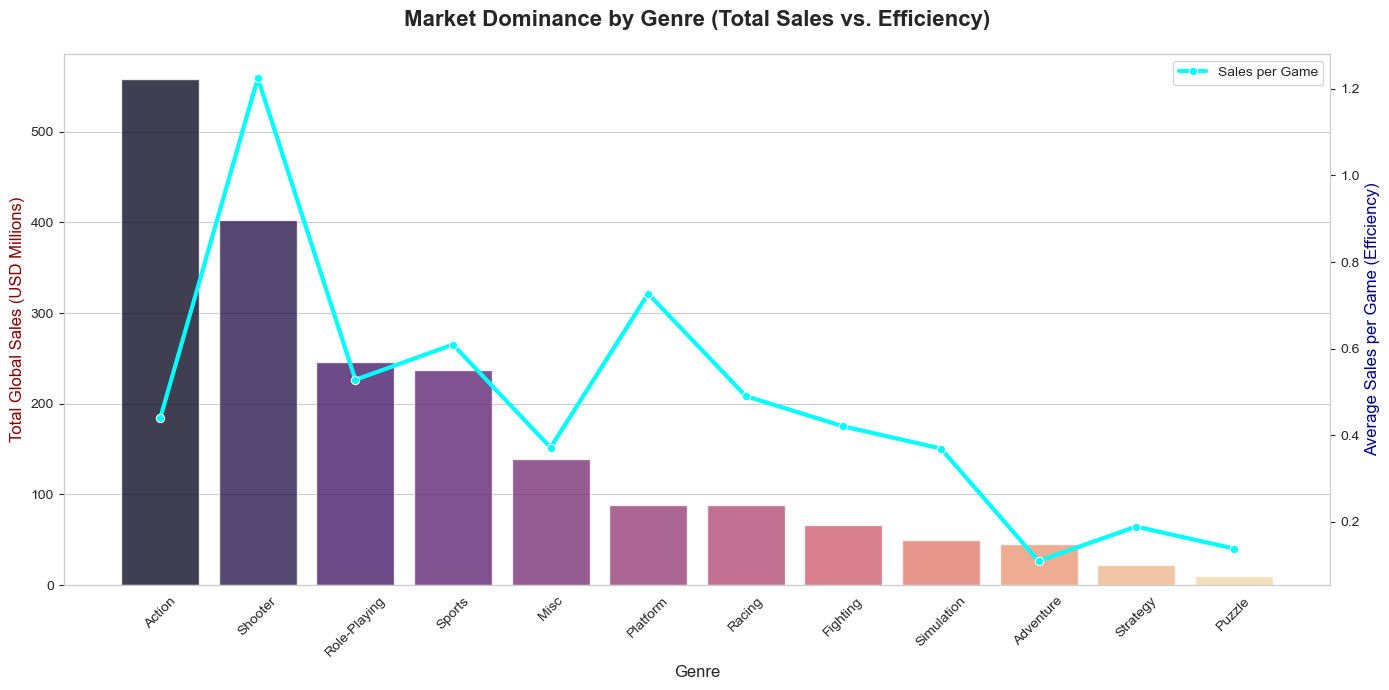

In [205]:
# Aggregating sales and counting titles per genre
genre_analysis = df_modern.groupby('genre').agg(
    total_sales=('total_sales', 'sum'),
    game_count=('name', 'count')
).reset_index()

# Calculating average sales per game to find the most "profitable" genres
genre_analysis['sales_per_game'] = genre_analysis['total_sales'] / genre_analysis['game_count']
genre_analysis = genre_analysis.sort_values('total_sales', ascending=False)

# Visualization
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.set_style("whitegrid")

# Bar plot for Total Sales
sns.barplot(
    data=genre_analysis, 
    x='genre', 
    y='total_sales', 
    hue='genre', 
    palette='magma', 
    ax=ax1, 
    alpha=0.8,
    legend=False
)
ax1.set_title('Market Dominance by Genre (Total Sales vs. Efficiency)', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Total Global Sales (USD Millions)', fontsize=12, color='darkred')
ax1.set_xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)

# Adding a line plot for Sales per Game (Efficiency) on a secondary axis
ax2 = ax1.twinx()
sns.lineplot(data=genre_analysis, x='genre', y='sales_per_game', marker='o', color='cyan', linewidth=3, label='Sales per Game', ax=ax2)
ax2.set_ylabel('Average Sales per Game (Efficiency)', fontsize=12, color='darkblue')
ax2.grid(False) # Clean look for the second axis

plt.tight_layout()
plt.show()

**Genre Analysis – Market Volume vs. Investment Efficiency**
**Strategic Insights on Genre Performance:**

* **The Dominance of Action**: Action is the clear leader in total sales volume (surpassing 550M USD), largely driven by a high frequency of releases. It is a reliable market for broad audience reach but faces the highest saturation.

* **Shooter: The Efficiency King**: While Shooter ranks second in total sales, it has the highest "Sales per Game" ratio (exceeding 1.2M USD per title). This indicates that, on average, a single Shooter title generates more revenue than any other genre, making it the most lucrative segment for focused high-budget investments.

* **Niche Performance (Platform & Sports)**: The Platform and Sports genres show strong efficiency despite lower total volumes. They represent stable market segments where established franchises consistently perform above the market average.

* **Low-Performance Segments**: Genres such as Adventure, Strategy, and Puzzle show both low total revenue and low efficiency. These segments appear to be high-risk for 2017 planning unless supported by a very strong, pre-existing IP.

## Step 4: Regional User Profiles
### Top 5 Platforms by Region

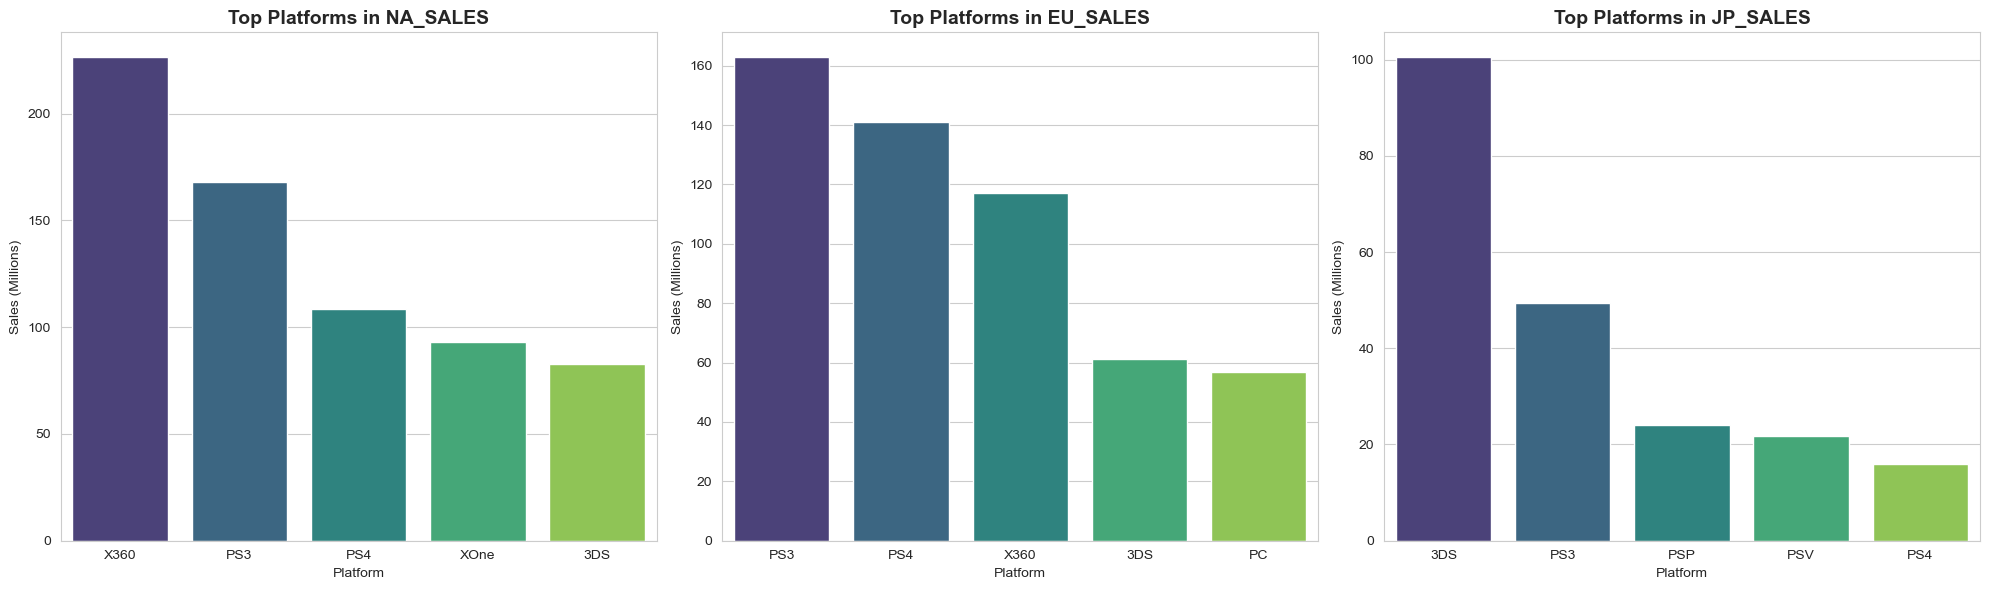

In [206]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, region in enumerate(regions):
    # Aggregating top 5 platforms per region
    top_platforms = df_modern.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    
    # Creating the plot
    sns.barplot(
        x=top_platforms.index, 
        y=top_platforms.values, 
        ax=axes[i], 
        hue=top_platforms.index, 
        palette='viridis', 
        legend=False
    )
    
    axes[i].set_title(f'Top Platforms in {region.upper()}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Sales (Millions)')
    axes[i].set_xlabel('Platform')

plt.tight_layout()
plt.show()

**Regional Market Segmentation**
**Comparative Insights by Region:**

* **North America (NA): The Xbox Stronghold**. Unlike other regions, the Xbox 360 led the market significantly. This highlights a strong preference for Microsoft's ecosystem in the Western market during this period.

* **Europe (EU): The PlayStation Territory**. PS3 and PS4 combined dominate the European landscape. Europe shows the most balanced transition between console generations, with a high adoption rate for Sony's new hardware.

* **Japan (JP): A Handheld World**. Japan presents a radical departure from Western trends. The Nintendo 3DS is the undisputed leader, and portable consoles (PSP, PSV) hold positions that don't even appear in the Top 5 of NA or EU.

* **Strategic Takeaway:** A "one-size-fits-all" marketing strategy is ineffective. For 2017, localized campaigns are mandatory: focus on handheld titles for Japan and high-end console blockbusters for the West.

### Top 5 Genres by Region

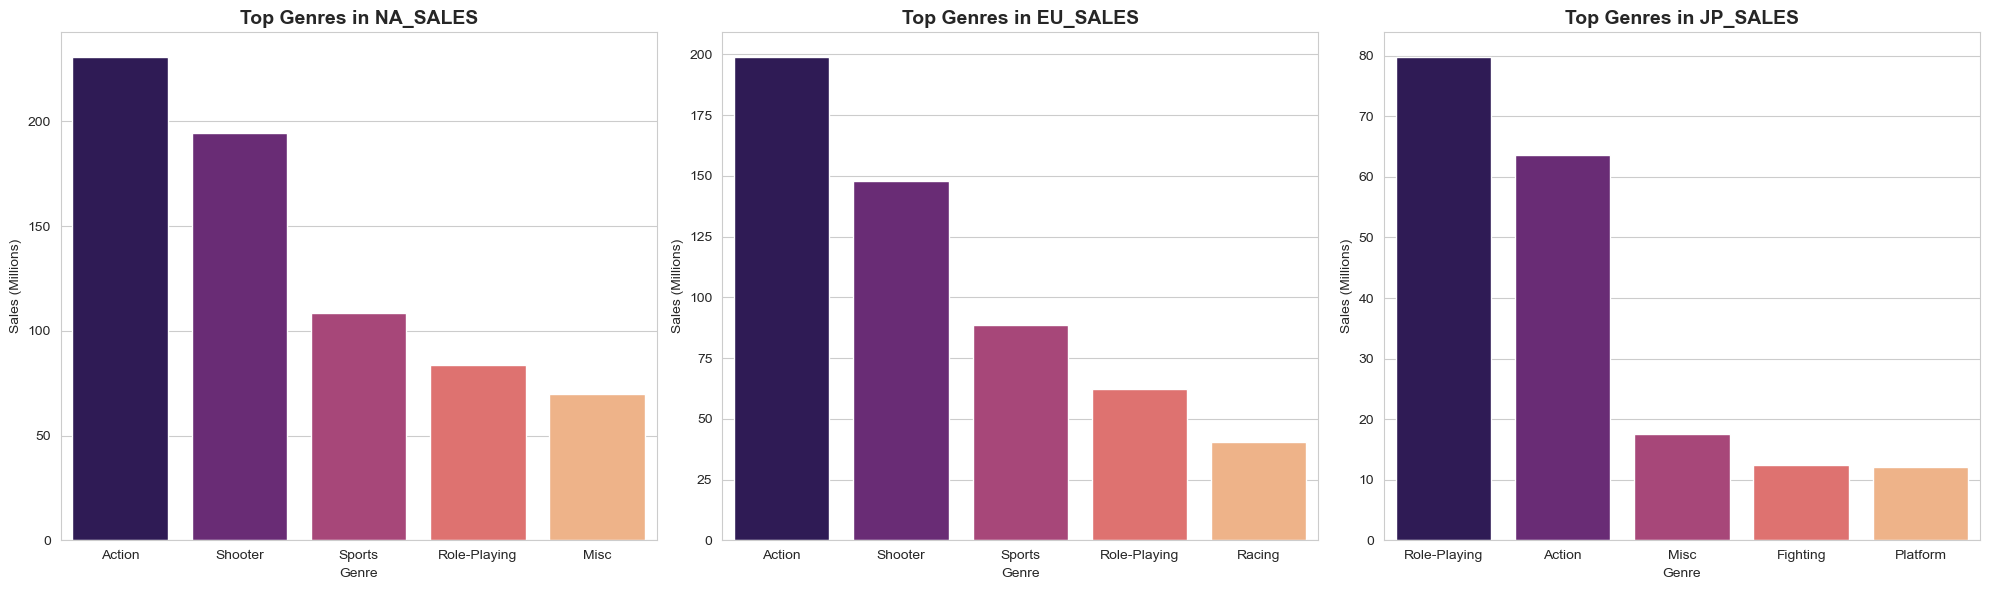

In [207]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, region in enumerate(regions):
    # Aggregating top 5 genres per region
    top_genres = df_modern.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    
    # Creating the plot
    sns.barplot(
        x=top_genres.index, 
        y=top_genres.values, 
        ax=axes[i], 
        hue=top_genres.index, 
        palette='magma', 
        legend=False
    )
    
    axes[i].set_title(f'Top Genres in {region.upper()}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Sales (Millions)')
    axes[i].set_xlabel('Genre')

plt.tight_layout()
plt.show()

**Regional Genre Analysis – A Tale of Two Worlds**
**Strategic Insights on Market Preferences:**

* **Western Homogeneity (NA & EU)**: North America and Europe share almost identical DNA. Action and Shooter are the undisputed leaders, moving the highest volume of capital. In these regions, the consumer profile leans heavily toward high-intensity, competitive, and cinematic experiences.

* **The Japanese RPG Phenomenon**: Japan completely breaks the pattern. Role-Playing (RPG) is the dominant genre by a wide margin, doubling the sales of the second place (Action). Notably, Shooter, which is a Top 2 pillar in the West, doesn't even appear in Japan's Top 5.

* **The "Sports" Divide**: While Sports is a Top 3 genre in NA and EU (driven by titles like FIFA and Madden), it loses significant relevance in Japan, being replaced by more niche genres like Fighting or Platform.

* **Portfolio Strategy for 2017:**

    * **For NA/EU**: Focus on high-budget Shooters and Action titles for consoles like PS4 and Xbox One.

    * **For JP**: Direct investment toward RPGs and handheld-friendly titles, as the market is culturally driven by narrative depth and portable gaming.

### Impact of ESRB Ratings

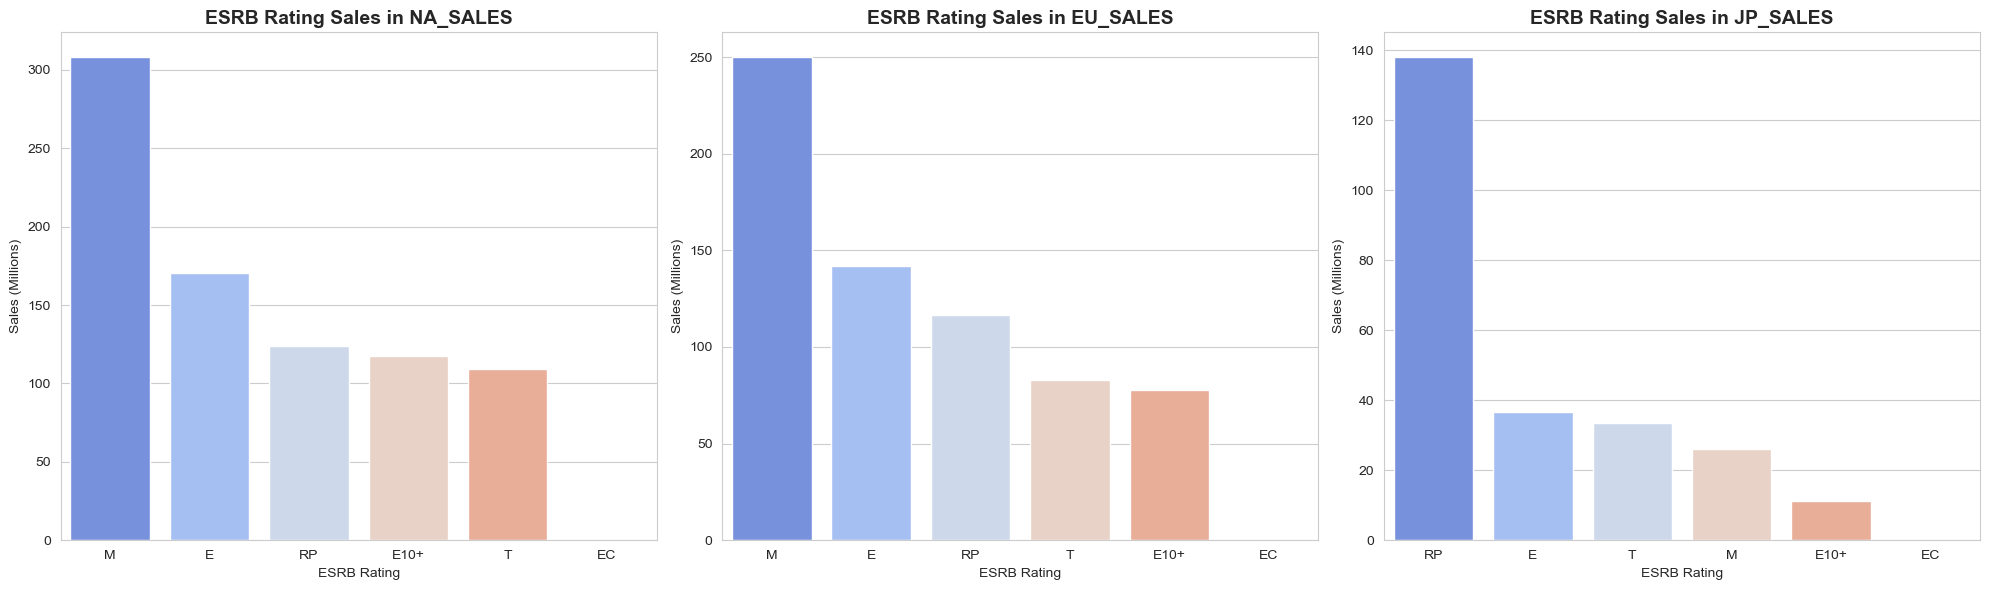

In [208]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, region in enumerate(regions):
    # Aggregating sales by ESRB rating (using your 'RP' fill)
    esrb_analysis = df_modern.groupby('rating')[region].sum().sort_values(ascending=False)
    
    # Creating the plot
    sns.barplot(
        x=esrb_analysis.index, 
        y=esrb_analysis.values, 
        ax=axes[i], 
        hue=esrb_analysis.index, 
        palette='coolwarm', 
        legend=False
    )
    
    axes[i].set_title(f'ESRB Rating Sales in {region.upper()}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Sales (Millions)')
    axes[i].set_xlabel('ESRB Rating')

plt.tight_layout()
plt.show()

**ESRB Rating Impact – The Regional Truth**
**Strategic Insights on Content Rating & Sales:**

* **Western Adult Market (NA & EU)**: In North America and Europe, "M" (Mature) is the absolute leader. This confirms that the highest revenue in the West comes from games targeted at adults (like Grand Theft Auto or Call of Duty).

* **The "RP" Enigma in Japan**: In Japan, "RP" (Rating Pending/Unknown) is the #1 category by a massive margin. This proves that the Western ESRB system has little to no penetration or relevance in the Japanese market, where local publishers likely use their own system (CERO).

* **Family Content Stability**: "E" (Everyone) remains the second most consistent category across all regions, showing that family-oriented titles (like those from Nintendo) are the only truly "global" safe bet for revenue.

* **The "M" Failure in Japan**: Notice how "M" (Mature) is the top seller in the West but falls to 4th place in Japan. Japanese consumers clearly prioritize different content types than their Western counterparts.

## Step 5: Statistical Hypothesis Testing

**Goal:** To validate whether the observed trends in our data are statistically significant or merely the result of random chance.

**Hypothesis 1: Xbox One vs. PC User Ratings**

* **Rationale:** We compared these two platforms to determine if user satisfaction differs between a dedicated, closed console ecosystem (Xbox One) and an open, multi-purpose platform (PC). This is crucial for understanding if platform-specific technical constraints or communities influence how users perceive game quality.

* **Null Hypothesis ($H_0$)**: *"The average user ratings for Xbox One and PC are the same."*

* **Alternative Hypothesis ($H_1$)**: *"The average user ratings for Xbox One and PC are different."*

**Hypothesis 2: Action vs. Sports Genre User Ratings**

* **Rationale:** These genres represent two distinct business models: the "Blockbuster/Story-driven" model (Action) versus the "Annual Iteration/Loyalty" model (Sports). Testing their rating averages helps us identify if one genre consistently satisfies its audience more than the other, which informs long-term investment strategies.
    
* **Null Hypothesis ($H_0$)**: *"The average user ratings for Action and Sports genres are the same."*
    
* **Alternative Hypothesis ($H_1$)**: *"The average user ratings for Action and Sports genres are different."*
    
**Significance Level ($\alpha$)**: 0.05


**Statistical Methodology:** We employ the "Independent Two-Sample T-test" (two-tailed) to compare user ratings. This test allows us to calculate the probability that the observed difference between the means of two populations is due to chance or represents a statistically significant difference.

**Assumptions Testing:** Before performing the T-test, we conduct Levene's Test to check for the equality of variances (homoscedasticity).

If the p-value of Levene's test is < 0.05, we reject the null hypothesis of equal variances and apply Welch's T-test (adjusting for unequal variances).

This ensures our final results are robust and accurate regardless of the distribution's spread.

In [209]:
# --- Sample Size Verification ---

sample_sizes = {
    "Xbox One": len(xbox_one_ratings),
    "PC": len(pc_ratings),
    "Action": len(action_ratings),
    "Sports": len(sports_ratings)
}

print("Sample Sizes Check:")
for name, size in sample_sizes.items():
    print(f"- {name}: {size} samples")
    if size < 30:
        print(f"  WARNING: Sample size for {name} is small. Results may be unreliable.")
    else:
        print(f"  Check passed: Sample size is sufficient.")

Sample Sizes Check:
- Xbox One: 182 samples
  Check passed: Sample size is sufficient.
- PC: 307 samples
  Check passed: Sample size is sufficient.
- Action: 664 samples
  Check passed: Sample size is sufficient.
- Sports: 246 samples
  Check passed: Sample size is sufficient.


In [210]:
# Function to perform full statistical check
def test_hypothesis(group1, group2, alpha=0.05):
    # 1. Levene's Test for equality of variances
    levene_res = st.levene(group1, group2)
    print(f"Levene's Test p-value: {levene_res.pvalue:.4f}")
    
    # Determine if variances are equal based on Levene's test
    is_equal_var = levene_res.pvalue > alpha
    if is_equal_var:
        print("Conclusion: Variances are equal. Using standard T-test.")
    else:
        print("Conclusion: Variances are unequal. Using Welch's T-test.")
    
    # 2. T-test (Independent)
    t_res = st.ttest_ind(group1, group2, equal_var=is_equal_var)
    print(f"T-test p-value: {t_res.pvalue:.4f}")
    
    if t_res.pvalue < alpha:
        print("Result: Reject the Null Hypothesis. The difference is statistically significant.")
    else:
        print("Result: Fail to reject the Null Hypothesis. The difference is not significant.")

In [211]:
# --- Running the tests ---

# --- Hypothesis 1: Xbox One vs PC ---
# Filtering the data and removing missing values
xbox_one_ratings = df_modern[(df_modern['platform'] == 'XOne') & (df_modern['user_score'].notna())]['user_score']
pc_ratings = df_modern[(df_modern['platform'] == 'PC') & (df_modern['user_score'].notna())]['user_score']

print("--- HYPOTHESIS 1: XBOX ONE VS. PC ---")
test_hypothesis(xbox_one_ratings, pc_ratings)

# --- Hypothesis 2: Action vs Sports ---
# Filtering the data and removing missing values
action_ratings = df_modern[(df_modern['genre'] == 'Action') & (df_modern['user_score'].notna())]['user_score']
sports_ratings = df_modern[(df_modern['genre'] == 'Sports') & (df_modern['user_score'].notna())]['user_score']

print("\n--- HYPOTHESIS 2: ACTION VS. SPORTS ---")
test_hypothesis(action_ratings, sports_ratings)

--- HYPOTHESIS 1: XBOX ONE VS. PC ---
Levene's Test p-value: 0.0192
Conclusion: Variances are unequal. Using Welch's T-test.
T-test p-value: 0.6131
Result: Fail to reject the Null Hypothesis. The difference is not significant.

--- HYPOTHESIS 2: ACTION VS. SPORTS ---
Levene's Test p-value: 0.0000
Conclusion: Variances are unequal. Using Welch's T-test.
T-test p-value: 0.0000
Result: Reject the Null Hypothesis. The difference is statistically significant.


**Hypothesis Testing Results & Interpretation**

**Test 1: Xbox One vs. PC (User Ratings)**

* **Statistical Outcome: Fail to reject the Null Hypothesis ($p=0.6131$).**

* **Insight:** There is no significant difference between the average user ratings of Xbox One and PC. This suggests that despite the technical differences between a console and a PC, the quality of the gaming experience perceived by the users remains consistent across these platforms.

**Test 2: Action vs. Sports (User Ratings)**

* **Statistical Outcome: Reject the Null Hypothesis ($p < 0.001$).**

* **Insight:** There is a highly significant difference in how users rate Action games versus Sports games. The near-zero p-value indicates that the gap in user satisfaction between these two genres is robust and not due to random fluctuations in the data.

## Final Note

### Beyond the Data

This analysis demonstrates that the video game market is not a monolith; success depends on a deep understanding of regional cultural nuances and platform lifecycles.

By combining Exploratory Data Analysis with Rigorous Statistical Testing, we have transformed raw sales data into a strategic roadmap for 2017. The findings highlight the importance of localized strategies—especially when entering unique markets like Japan—and the reliability of user satisfaction across modern gaming ecosystems.

*Analysis by Fiorella Trigo M.*